## Capstone 2: Cryptocurrency Financial Trading Tool

The purpose of this tool is to demonstrate the simplicity of financial market analysis using Python and pandas.

Cryptocurrency has garnered more attention than ever as a direct result of the ongoing pandemic. With less face-to-face exchanges and more sanitary concerns, it is no surprise that people are relying on debit or credit more than physical cash for example.

To illustrate this popularity, we will look at the market value of 10 cryptocurrencies from 2013 to 2017. These include Bitcoin, Bitcoin Cash, Bytecoin, Dogecoin, Ethereum, Litecoin, NEO, Ripple, Stellar Lumens, and Zcash.

For this analysis, I will be using moving averages to indicate where to buy and sell cryptocurrency stock. I will also be ranking each currency by the most recent market cap price. Note that the closing price is not adjusted.

---------------------------------------------------------------------------

### Part I: Data Cleansing

In [31]:
#importing libraries
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

---------------------------------------------------------------------------

In [32]:
#reading crypto files
bitcoin = pd.read_csv("CryptoMarketData/Bitcoin.csv", index_col = 'Date')
bitcoin_cash = pd.read_csv("CryptoMarketData/Bitcoin Cash.csv", index_col = 'Date')
bytecoin = pd.read_csv("CryptoMarketData/Bytecoin.csv", index_col = 'Date')
dogecoin = pd.read_csv("CryptoMarketData/Dogecoin.csv", index_col = 'Date')
ethereum = pd.read_csv("CryptoMarketData/Ethereum.csv", index_col = 'Date')
litecoin = pd.read_csv("CryptoMarketData/Litecoin.csv", index_col = 'Date')
neo = pd.read_csv("CryptoMarketData/NEO.csv", index_col = 'Date')
ripple = pd.read_csv("CryptoMarketData/Ripple.csv", index_col = 'Date')
ripple2 = pd.read_csv("CryptoMarketData/Ripple2.csv", index_col = 'Date')
stellar = pd.read_csv("CryptoMarketData/Stellar Lumens.csv", index_col = 'Date')
zcash = pd.read_csv("CryptoMarketData/Zcash.csv", index_col = 'Date')

#printing btc info
print(bitcoin.head(10))
print(bitcoin.describe())
print(bitcoin_cash.info())

                 Open     High      Low    Close         Volume  \
Date                                                              
Sep 22, 2017  3628.02  3758.27  3553.53  3630.70  1,194,830,000   
Sep 21, 2017  3901.47  3916.42  3613.63  3631.04  1,411,480,000   
Sep 20, 2017  3916.36  4031.39  3857.73  3905.95  1,213,830,000   
Sep 19, 2017  4073.79  4094.07  3868.87  3924.97  1,563,980,000   
Sep 18, 2017  3591.09  4079.23  3591.09  4065.20  1,943,210,000   
Sep 17, 2017  3606.28  3664.81  3445.64  3582.88  1,239,150,000   
Sep 16, 2017  3637.75  3808.84  3487.79  3625.04  1,818,400,000   
Sep 15, 2017  3166.30  3733.45  2946.62  3637.52  4,148,070,000   
Sep 14, 2017  3875.37  3920.60  3153.86  3154.95  2,716,310,000   
Sep 13, 2017  4131.98  4131.98  3789.92  3882.59  2,219,410,000   

                  Market Cap  
Date                          
Sep 22, 2017  60,152,300,000  
Sep 21, 2017  64,677,600,000  
Sep 20, 2017  64,918,500,000  
Sep 19, 2017  67,520,300,000  
Sep 18, 2

---------------------------------------------------------------------------

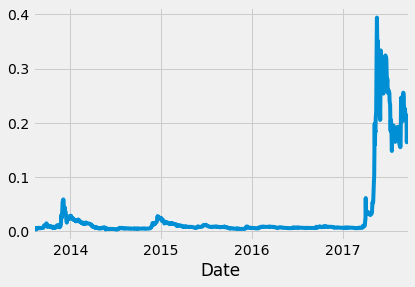

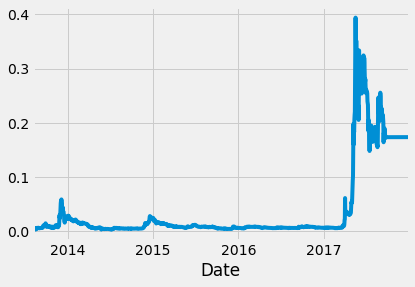

In [40]:
#closing price for 10 cryptocurrencies
btc_close = bitcoin['Close']
btc_close.index = pd.to_datetime(btc_close.index)

bch_close = bitcoin_cash['Close']
bch_close.index = pd.to_datetime(bch_close.index)

bcn_close = bytecoin['Close']
bcn_close.index = pd.to_datetime(bcn_close.index)

doge_close = dogecoin['Close']
doge_close.index = pd.to_datetime(doge_close.index)

eth_close = ethereum['Close']
eth_close.index = pd.to_datetime(eth_close.index)

ltc_close = litecoin['Close']
ltc_close.index = pd.to_datetime(ltc_close.index)

neo_close = neo['Close']
neo_close.index = pd.to_datetime(neo_close.index)

xrp_close = ripple['Close']
xrp_close.index = pd.to_datetime(xrp_close.index)

xrp_close2 = ripple2['Close']
xrp_close2.index = pd.to_datetime(xrp_close2.index)

xlm_close = stellar['Close']
xlm_close.index = pd.to_datetime(xlm_close.index)

zec_close = zcash['Close']
zec_close.index = pd.to_datetime(zec_close.index)

#plotting btc & xlm to compare how closing data looks
xrp_close.plot()
plt.show()

xrp_close2.plot()
plt.show()

---------------------------------------------------------------------------

### Part II: Insights

#### Simple, Weighted, and Exponential Moving Average

Using these 3 moving average techniques, we'll be able to forecast the closing price of any cryptocurrency beyond September 2017 and create buy or sell signals based on line charts.

In [35]:
#10, 20, and 50 day simple moving average
sma10 = xrp_close.rolling(window = 10).mean()
sma20 = xrp_close.rolling(window= 20).mean()
sma50 = xrp_close.rolling(window = 50).mean()
sma50.iloc[45:52]

#10, 20, and 50 day weighted moving average
weights10 = np.arange(1,11)
wma10 = xrp_close.rolling(10).apply(lambda prices: np.dot(prices, weights10)/weights10.sum(), raw=True)
weights20 = np.arange(1,21)
wma20 = xrp_close.rolling(20).apply(lambda prices: np.dot(prices, weights20)/weights20.sum(), raw=True)
weights50 = np.arange(1,51)
wma50 = xrp_close.rolling(50).apply(lambda prices: np.dot(prices, weights50)/weights50.sum(), raw=True)

#10, 20, and 50 day exponential moving average
ema10 = xrp_close.ewm(span = 10).mean()
ema20 = xrp_close.ewm(span = 20).mean()
ema50 = xrp_close.ewm(span = 50).mean()


#creating SMA, WMA, and EMA dataframes
priceSma_df = pd.DataFrame({
      'Close' : xrp_close,
      'SMA 10' : sma10,
      'SMA 20' : sma20, 
      'SMA 50' : sma50
     })

priceWma_df = pd.DataFrame({
      'Close' : xrp_close,
      'WMA 10' : wma10,
      'WMA 20' : wma20, 
      'WMA 50' : wma50
     })

priceEma_df = pd.DataFrame({
      'Close' : xrp_close,
      'EMA 10' : ema10, 
      'EMA 20' : ema20,
      'EMA 50' : ema50
     })

---------------------------------------------------------------------------

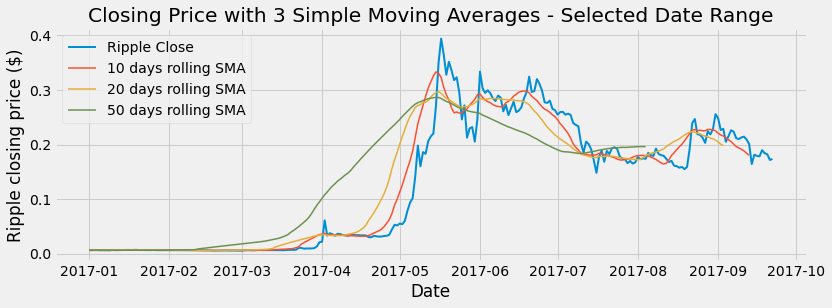

In [38]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,4))

#Plotting price and all SMAs with a specified date range:
plt.plot(priceSma_df['2017':'2017']['Close'], label='Ripple Close', linewidth = 2)
plt.plot(priceSma_df['2017':'2017']['SMA 10'], label='10 days rolling SMA', linewidth = 1.5)
plt.plot(priceSma_df['2017':'2017']['SMA 20'], label='20 days rolling SMA', linewidth = 1.5)
plt.plot(priceSma_df['2017':'2017']['SMA 50'], label='50 days rolling SMA', linewidth = 1.5)
plt.xlabel('Date')    
plt.ylabel('Ripple closing price ($)')
plt.title('Closing Price with 3 Simple Moving Averages - Selected Date Range')
plt.legend()
plt.show()

---------------------------------------------------------------------------

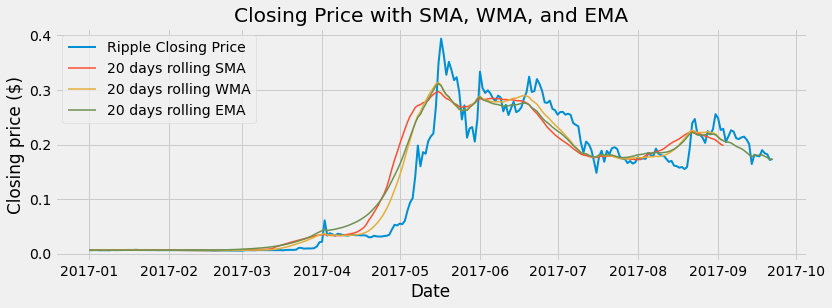

In [37]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,4))

#Plotting btc closing price with SMA, WMA, & EMA:
plt.plot(priceSma_df['2017':'2017']['Close'], label='Ripple Closing Price', linewidth = 2)
plt.plot(priceSma_df['2017':'2017']['SMA 20'], label='20 days rolling SMA', linewidth = 1.5)
plt.plot(priceWma_df['2017':'2017']['WMA 20'], label='20 days rolling WMA', linewidth = 1.5)
plt.plot(priceEma_df['2017':'2017']['EMA 20'], label='20 days rolling EMA', linewidth = 1.5)
plt.xlabel('Date')
plt.ylabel('Closing price ($)')
plt.title('Closing Price with SMA, WMA, and EMA')
plt.legend()
plt.show()

---------------------------------------------------------------------------

#### Testing the accuracy of my moving average models

Here, I am checking the error percentage of my model with 3 different moving averages. This will give an idea of how close my prediction is to the actual value. In this example, I check the mean average percent error for Bitcoin's SMA. 

In [39]:
btcSMA_mape = []
btcWMA_mape = []
btcEMA_mape = []

for i in priceSma_df.index:
    btcSMA_mape.append(100*(abs(priceSma_df['SMA 10'][i] - priceSma_df['Close'][i]))/priceSma_df['Close'][i])
for i in priceWma_df.index:
    btcWMA_mape.append(100*(abs(priceWma_df['WMA 10'][i] - priceWma_df['Close'][i]))/priceWma_df['Close'][i])
for i in priceEma_df.index:
    btcEMA_mape.append(100*(abs(priceEma_df['EMA 10'][i] - priceEma_df['Close'][i]))/priceEma_df['Close'][i])
    
priceSma_df['MAPE sma10'] = btcSMA_mape
priceWma_df['MAPE wma10'] = btcWMA_mape
priceEma_df['MAPE ema10'] = btcEMA_mape

print(str(round(priceSma_df['MAPE sma10'].mean(), 1)) + '% error for 10 day SMA')
print(str(round(priceWma_df['MAPE wma10'].mean(), 1)) + '% error for 10 day WMA')
print(str(round(priceEma_df['MAPE ema10'].mean(), 1)) + '% error for 10 day EMA')
priceSma_df.tail(20)


9.7% error for 10 day SMA
6.9% error for 10 day WMA
8.9% error for 10 day EMA


,Close,SMA 10,SMA 20,SMA 50,MAPE sma10
Date,,,,,
2013-08-23,0.005139,0.005902,0.005910,0.008223,14.839463
2013-08-22,0.005143,0.005837,0.005853,0.008147,13.497958
2013-08-21,0.006131,0.005887,0.005869,0.008072,3.978144
2013-08-20,0.006098,0.005904,0.005861,0.008001,3.183011
2013-08-19,0.005260,0.005854,0.005815,0.007917,11.285171
2013-08-18,0.005617,0.005791,0.005787,0.007845,3.092398
2013-08-17,0.005671,0.005713,0.005777,0.007762,0.733557
2013-08-16,0.003134,0.005384,0.005648,0.007635,71.802808
2013-08-15,0.003092,0.005083,0.005518,0.007499,64.395213
